##### BUILDING A LOGISTIC MODEL FOR DETERMINING THE LEAD CONVERSION RATE

## Step-1) Importing Libraries

In [1]:
import numpy as np , pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
pd.options.display.max_columns= None
pd.options.display.max_rows= None
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Step-2) Loading the Dataset

In [2]:
df= pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step-3) Data Sanity

In [3]:
# Determining the shape of the dataset.
df.shape

(9240, 37)

In [4]:
# Determining the info of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Determining the column name of the datasets
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# Describing the dataset.
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Determining the null values of the dataset.
100*(df.isnull().sum()/len(df))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## Step-4) Data Cleaning and Preparation
##### Encoding Categorical variables
##### Missing Value Handling
##### Convert select into NaN
##### Dropping columns having more than 70% null values

In [8]:
# Encoding Categorical variables
for feature in ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']:
    df[feature]= df[feature].apply(lambda x : 1 if x=='Yes' else 0)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [9]:
# Seperating the columns having categorical dataset
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [10]:
# Replacing select with NaN
df=df.replace('Select',np.nan)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
# Dropping columns having null values greater than 70% 
df=df.drop(df.loc[:,list(round(df.isnull().sum()/df.shape[0],2)>0.70)].columns,1)

In [13]:
# As Lead Quality depends upon the intution of the enployee, we ill update the NaN to"not sure
df['Lead Quality']=df['Lead Quality'].replace(np.nan,"Not Sure")

In [14]:
df=df.drop(['Asymmetrique Activity Index',
            'Asymmetrique Profile Index','Asymmetrique Activity Score',
            'Asymmetrique Profile Score'],axis=1)

In [15]:
# Imputing values of NaN
df['City'].fillna(df['City'].mode()[0],inplace=True)
df['Specialization'].fillna(df['Specialization'].mode()[0],inplace=True)
df['Tags'].fillna(df['Tags'].mode()[0],inplace=True)
df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0],inplace=True)
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0],inplace=True)
df['Country'].fillna(df['Country'].mode()[0],inplace=True)

In [16]:
round(100*(df.isnull().sum()/len(df)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [17]:
# Dropping rows having null values.
df.dropna(inplace=True)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


## Step-5) Exploratory Data Analysis

In [18]:
# Checking Data Imbalance
df['Converted'].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

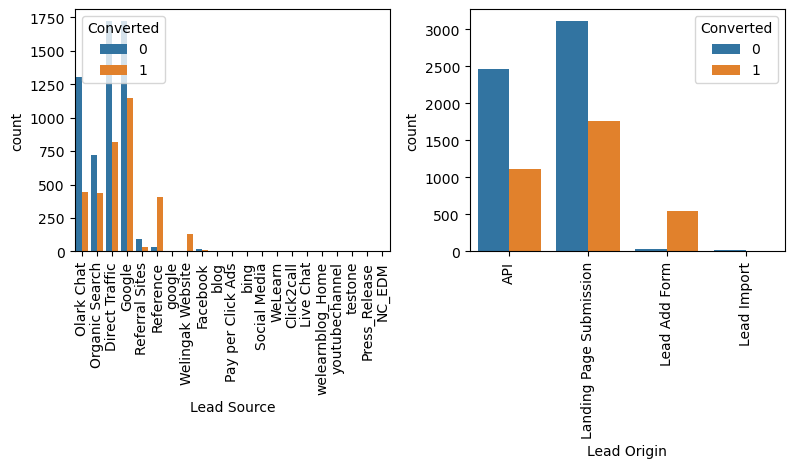

In [19]:
fig=plt.subplots(figsize=(12,12))
for i, feature in enumerate(['Lead Source','Lead Origin']):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace=5.0)
    sns.countplot(df[feature],hue=df['Converted'])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### OBSERVATIONS
###### API and Landing Page Submission has less conversion rate but count of leads from them are considerable.
###### The count of leads from Lead Add Form is low but conversion is very high.
###### Lead Import has very less count as well as conversion rate hence can be ignored.

In [20]:
# value_count to merge values having less value_count to others
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [21]:
# Converting values having less value_count to others.
df['Lead Source']=df['Lead Source'].replace(['Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM','bing'],'other_lead_source')


In [22]:
df['Lead Source']=df['Lead Source'].replace("google",'Google')

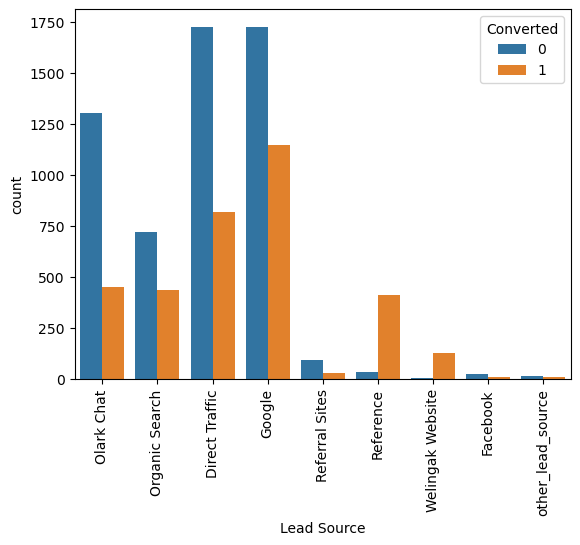

In [23]:
# Plotting the lead source against converted.
sns.countplot(x='Lead Source',hue= 'Converted',data=df)
plt.xticks(rotation=90)
plt.show()

## OBSERVATIONS
The count of lead from Google and Direct Traffic is maximum.

The conversion rate of lead from Refrence and Welingak Website is maximum.

To improve the overall conversion rate, we need to focus on increasing conversion from 'Google','Olark Chat','Organic Search' and also incresing the number of leads from 'Refrence' and 'Welingak Website'.

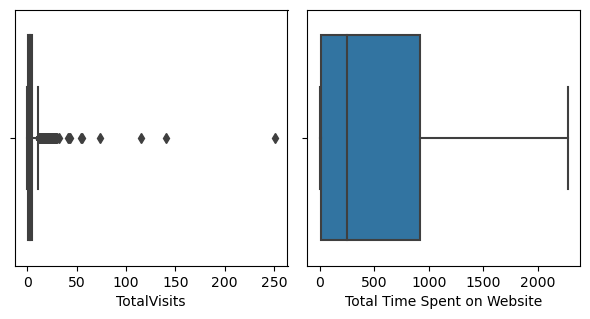

In [24]:
#  Determining the outliers
fig=plt.subplots(figsize=(6,6))
for i, feature in enumerate(['TotalVisits','Total Time Spent on Website']):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.boxplot(df[feature])
    plt.tight_layout()

In [25]:
#  Capping the outliers of TotalVisits.
q1=df['TotalVisits'].quantile(0.95)
df['TotalVisits'][df['TotalVisits']>=q1]=q1

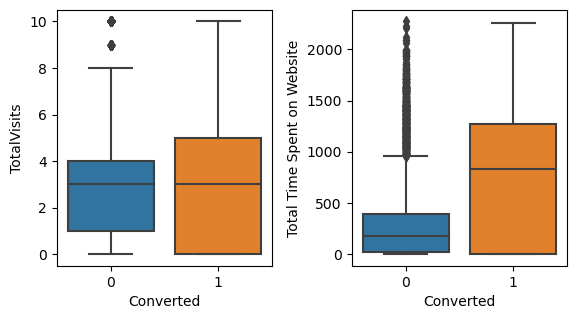

In [26]:
fig=plt.subplots(figsize=(6,6))
for i, feature in enumerate(['TotalVisits','Total Time Spent on Website']):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.boxplot(y=df[feature], x='Converted',data=df)
    plt.tight_layout()

## OBSERVATIONS
The median of both conversion and non conversion are same and hence nothing conclusive can be said.

User spending more time onthe website are more likely to get converted.

In [27]:
# value_count to merge values having less value_count to others
df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [28]:
# Converting the low value count to others
df['Last Activity']=df['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'other_activity')

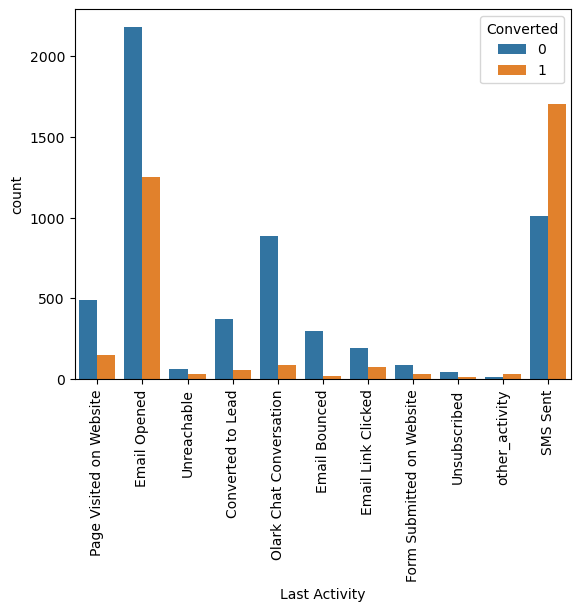

In [29]:
# Ploting last activity against converted.
sns.countplot(x='Last Activity',hue= 'Converted',data=df)
plt.xticks(rotation=90)
plt.show()

## OBSERVATIONS
The count of last activity as 'Email Opened' is maximum.

The conversion rate of SMS sent as last activity is maximum.

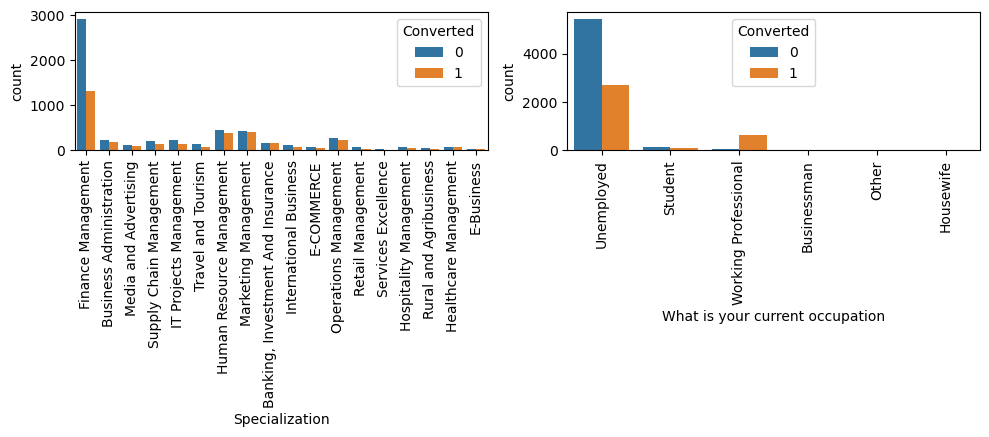

In [30]:
fig=plt.subplots(figsize=(10,6))
for i, feature in enumerate(['Specialization','What is your current occupation']):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.countplot(x=feature,hue=df['Converted'],data=df)
    plt.xticks(rotation=90)
    plt.tight_layout()

## OBSERVATIONS 
Working preofessional have more conversion rate.
Number of unemployed leads are more than any other category.

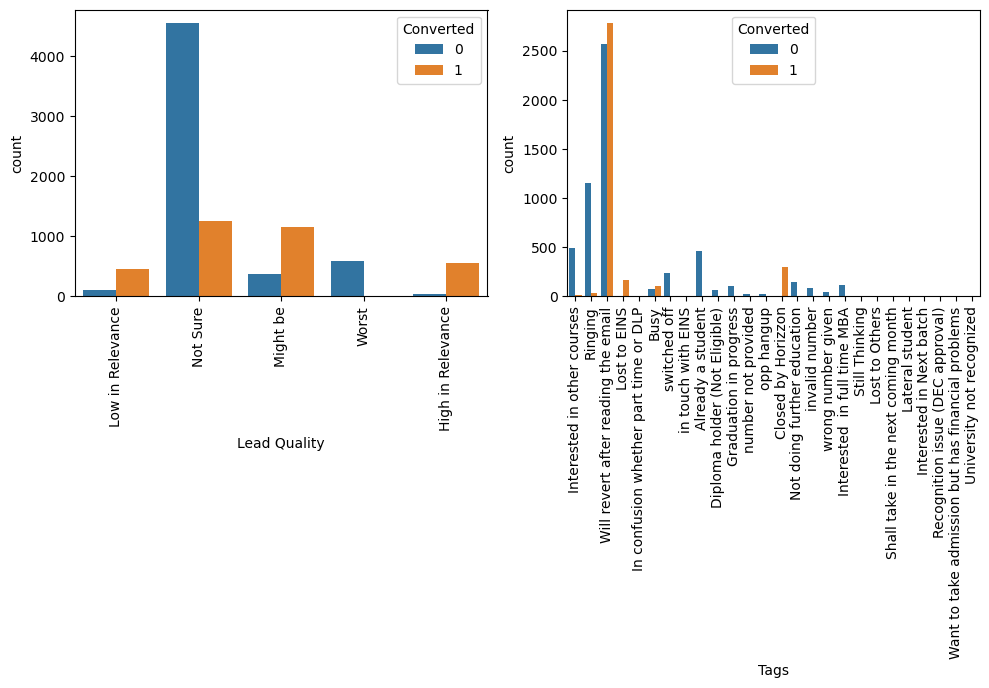

In [31]:
fig=plt.subplots(figsize=(10,10))
for i, feature in enumerate(['Lead Quality','Tags']):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.countplot(x=feature,hue=df['Converted'],data=df)
    plt.xticks(rotation=90)
    plt.tight_layout()

In [32]:
#  Converting low value_counts() to others
df['Tags']=df['Tags'].replace(['In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','Graduation in progress','Lost to EINS'],'other_Tags')

## OBSERVATIONS
'Will revert after reading the email' and 'Closed by Horizon' have high conversion rate. 

In [33]:
#  Dropping Unnecessary Columns
df=df.drop(['Lead Number','What matters most to you in choosing a course',
            'Search','Magazine','Newspaper Article', 'X Education Forums', 
            'Newspaper','Digital Advertisement', 'Through Recommendations',
            'Receive More Updates About Our Courses','Update me on Supply Chain Content',
            'Get updates on DM Content','I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview','Country','Do Not Call'],axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


## Step-6) Dummy Variable Creation.

In [34]:
dummy= pd.get_dummies(df[['Lead Origin', 'Lead Source','Last Activity', 'Specialization',
       'What is your current occupation','Tags', 'Lead Quality', 'City','Last Notable Activity']],drop_first=True)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [35]:
df=df.drop(['Lead Origin', 'Lead Source','Last Activity', 'Specialization',
       'What is your current occupation','Tags', 'Lead Quality', 'City','Last Notable Activity'],axis=1)

In [36]:
df=pd.concat([df,dummy],axis=1)
df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_other_lead_source,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_other_activity,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_other_Tags,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [37]:
#  checking the conversion rate
print("Conversion rate is ", (sum(df['Converted'])/len(df['Converted'].index))*100)

Conversion rate is  37.85541106458012


## Step-7) Train-Test Split

In [38]:
# Spliting into X and y
X=df.drop(['Prospect ID','Converted'],axis=1)
y= df['Converted']

In [39]:
# Spliting the data into training and testing sets
#Importing train_test_split from sklearn library  from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [40]:
conv_corr= df.corr()
conv_corr_unstacked=conv_corr.unstack().sort_values(kind='quicksort')
conv_corr.where(np.triu(np.ones(conv_corr.shape),k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                             0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800686
TotalVisits                            Page Views Per Visit                             0.737996
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.691811
Do Not Email                           Last Activity_Email Bounced                      0.620041
Last Activity_Unreachable              Last Notable Activity_Unreachable                0.594369
dtype: float64

In [41]:
# Dropping highlt correlated features
X_test=X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_Email Opened',
                    'Last Notable Activity_SMS Sent','Last Notable Activity_Unreachable',
                    'Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'],axis=1)
X_train=X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_Email Opened',
                    'Last Notable Activity_SMS Sent','Last Notable Activity_Unreachable',
                    'Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'],axis=1)

In [42]:
conv_corr= X_train.corr()

In [43]:
conv_corr.where(np.triu(np.ones(conv_corr.shape),k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form              Lead Source_Reference                             0.859537
TotalVisits                            Page Views Per Visit                              0.756104
Do Not Email                           Last Activity_Email Bounced                       0.624939
Last Activity_other_activity           Last Notable Activity_Had a Phone Conversation    0.593057
Page Views Per Visit                   Lead Origin_Landing Page Submission               0.493007
Lead Origin_Lead Add Form              Lead Source_Welingak Website                      0.468225
Last Activity_Email Bounced            Last Notable Activity_Email Bounced               0.450911
TotalVisits                            Lead Origin_Landing Page Submission               0.447765
Lead Source_Olark Chat                 Last Activity_Olark Chat Conversation             0.419173
Last Activity_Olark Chat Conversation  Last Notable Activity_Olark Chat Conversation     0.406150
dtype: float64

## Step-8) Model Building

In [44]:
# Adding the constant
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [45]:
model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           76
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1424.9
Date:                Mon, 16 Oct 2023   Deviance:                       2849.7
Time:                        16:10:31   Pearson chi2:                 1.99e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5870
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4915      1.667     -0.295      0.768      -3.759       2.776
Do Not Email                                            -1.5989      0.310     -5.154      0.000      -2.207      -0.991
TotalVisits                                              0.0428      0.028      1.504      0.133      -0.013       0.099
Total Time Spent on Website                              0.0021      0.000     19.559      0.000       0.002       0.002
Page Views Per Visit                                    -0.0749      0.039     -1.937      0.053      -0.151       0.001
Lead Origin_Landing Page Submission                     -0.6110      0.168     -3.632      0.000      -0.941      -0.281
Lead Origin_Lead Add Form                               -0.7444      1.228     -0.606      0.544      -3.150       1.662
Lead Origin_Lead Import                                  0.9301      0.746      1.246      0.213      -0.533       2.393
Lead Source_Google                                       0.0805      0.141      0.570      0.569      -0.196       0.357
Lead Source_Olark Chat                                   0.9981      0.214      4.663      0.000       0.579       1.418
Lead Source_Organic Search                              -0.0164      0.193     -0.085      0.932      -0.395       0.362
Lead Source_Reference                                    2.3949      1.282      1.868      0.062      -0.118       4.908
Lead Source_Referral Sites                              -0.2234      0.470     -0.475      0.635      -1.145       0.698
Lead Source_Welingak Website                             5.9436      1.432      4.150      0.000       3.137       8.751
Lead Source_other_lead_source                            0.7526      0.818      0.920      0.358      -0.852       2.357
Last Activity_Email Bounced                             -0.1288      0.810     -0.159      0.874      -1.716       1.459
Last Activity_Email Link Clicked                        -0.3013      0.415     -0.725      0.468      -1.115       0.513
Last Activity_Email Opened                               0.0676      0.315      0.215      0.830      -0.550       0.686
Last Activity_Form Submitted on Website                  0.5963      0.502      1.189      0.235      -0.387       1.579
Last Activity_Olark Chat Conversation                   -0.3974      0.365     -1.090      0.276      -1.112       0.317
Last Activity_Page Visited on Website                    0.0334      0.365      0.092      0.927      -0.681       0.748
Last Activity_SMS Sent                                   1.9231      0.313      6.138      0.000       1.309       2.537
Last Activity_Unreachable                                1

## Step-9) FEATURE SELECTION
#### There are three approaches of selecting feature- 

1)Automated- RFE is used for automated model selection. 

2)Mannual- VIF and p value are used for model selection. 

3)Hybrid- Both the approaches are combined together.

In [46]:
#Recursive Feature Elimination
estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=15)
selector.fit(X_train,y_train)
selector.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False])

In [47]:
cols_to_keep=X_train.columns[selector.support_]

In [48]:
cols_to_keep

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_other_Tags', 'Tags_switched off', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [49]:
X_train=X_train[cols_to_keep]
X_test=X_test[cols_to_keep]

##### Assessing the model with statsmodel

In [50]:
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [51]:
model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1713.2
Date:                Mon, 16 Oct 2023   Deviance:                       3426.3
Time:                        16:10:41   Pearson chi2:                 2.59e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5478
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7269      0.282     -6.126      0.000      -2.279      -1.174
Do Not Email                                            -1.5111      0.220     -6.868      0.000      -1.942      -1.080
Lead Source_Welingak Website                             4.1929      0.733      5.723      0.000       2.757       5.629
Last Activity_SMS Sent                                   1.8232      0.098     18.568      0.000       1.631       2.016
What is your current occupation_Working Professional     1.5513      0.287      5.413      0.000       0.990       2.113
Tags_Busy                                                3.7590      0.362     10.373      0.000       3.049       4.469
Tags_Closed by Horizzon                                  8.6176      0.784     10.998      0.000       7.082      10.153
Tags_Ringing                                            -1.2971      0.375     -3.456      0.001      -2.033      -0.562
Tags_Will revert after reading the email                 3.9017      0.286     13.642      0.000       3.341       4.462
Tags_invalid number                                    -21.7412   1.36e+04     -0.002      0.999   -2.68e+04    2.67e+04
Tags_other_Tags                                          4.5828      0.322     14.244      0.000       3.952       5.213
Tags_switched off                                       -1.7828      0.609     -2.926      0.003      -2.977      -0.588
Lead Quality_Not Sure                                   -3.0305      0.118    -25.577      0.000      -3.263      -2.798
Lead Quality_Worst                                      -3.6129      0.467     -7.743      0.000      -4.527      -2.698
Last Notable Activity_Modified                          -1.5248      0.099    -15.411      0.000      -1.719      -1.331
Last Notable Activity_Olark Chat Conversation           -1.1955      0.330     -3.618      0.000      -1.843      -0.548
========================================================================================================================
"""

In [52]:
X_train_sm=X_train_sm.drop(["Tags_invalid number"],axis=1)
X_test_sm=X_test_sm.drop(["Tags_invalid number"],axis=1)

In [53]:
model2=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1716.8
Date:                Mon, 16 Oct 2023   Deviance:                       3433.6
Time:                        16:10:41   Pearson chi2:                 2.60e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5472
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9438      0.283     -6.875      0.000      -2.498      -1.390
Do Not Email                                            -1.5111      0.220     -6.879      0.000      -1.942      -1.081
Lead Source_Welingak Website                             4.1930      0.732      5.724      0.000       2.757       5.629
Last Activity_SMS Sent                                   1.8044      0.098     18.479      0.000       1.613       1.996
What is your current occupation_Working Professional     1.5898      0.290      5.482      0.000       1.021       2.158
Tags_Busy                                                3.9807      0.362     11.002      0.000       3.272       4.690
Tags_Closed by Horizzon                                  8.8211      0.784     11.245      0.000       7.284      10.359
Tags_Ringing                                            -1.0678      0.374     -2.856      0.004      -1.800      -0.335
Tags_Will revert after reading the email                 4.1152      0.287     14.337      0.000       3.553       4.678
Tags_other_Tags                                          4.7902      0.324     14.807      0.000       4.156       5.424
Tags_switched off                                       -1.5494      0.608     -2.548      0.011      -2.741      -0.357
Lead Quality_Not Sure                                   -3.0235      0.118    -25.569      0.000      -3.255      -2.792
Lead Quality_Worst                                      -3.5913      0.468     -7.678      0.000      -4.508      -2.675
Last Notable Activity_Modified                          -1.5155      0.099    -15.340      0.000      -1.709      -1.322
Last Notable Activity_Olark Chat Conversation           -1.1967      0.330     -3.622      0.000      -1.844      -0.549
========================================================================================================================
"""

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) \
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,15.403256
1,Do Not Email,1.031773
2,Lead Source_Welingak Website,1.031071
3,Last Activity_SMS Sent,1.170995
4,What is your current occupation_Working Profes...,1.194065
5,Tags_Busy,1.204486
6,Tags_Closed by Horizzon,1.373508
7,Tags_Ringing,2.077766
8,Tags_Will revert after reading the email,2.895726
9,Tags_other_Tags,1.288405


## Step-10) Model Evaluation

In [55]:
# Getting predicted values of train set
y_train_pred= result2.predict(X_train_sm)
y_train_pred[:10]

3009    0.298991
1012    0.315755
9226    0.003185
4750    0.721578
7987    0.527905
1281    0.981581
2880    0.298991
4971    0.693759
7536    0.897650
1248    0.003185
dtype: float64

In [56]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29899051, 0.31575451, 0.0031846 , 0.72157803, 0.5279046 ,
       0.9815813 , 0.29899051, 0.6937595 , 0.89765041, 0.0031846 ])

In [57]:
# Creating a Dataframe
y_train_pred_final=pd.DataFrame({'Convert':y_train.values,'Convert_prob':y_train_pred})
y_train_pred_final['Pros ID']=y_train.index
y_train_pred_final.head()

,Convert,Convert_prob,Pros ID
0,0,0.298991,3009
1,0,0.315755,1012
2,0,0.003185,9226
3,1,0.721578,4750
4,1,0.527905,7987


In [58]:
#  Creating a new column Predicted with 0 and 1
y_train_pred_final['Predicted']=y_train_pred_final.Convert_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_prob,Pros ID,Predicted
0,0,0.298991,3009,0
1,0,0.315755,1012,0
2,0,0.003185,9226,0
3,1,0.721578,4750,1
4,1,0.527905,7987,1


In [59]:
print("Accuracy_score: ",metrics.accuracy_score(y_train_pred_final.Convert,y_train_pred_final.Predicted))

Accuracy_score:  0.9071012438985987


## Step-11) Making Confusion Matrix

In [60]:

def evaluate_model(y_true,y_true_predicted,print_score=False):
    confusion=metrics.confusion_matrix(y_true,y_true_predicted)
    TP=confusion[1,1]
    TN=confusion[0,0]
    FP=confusion[0,1]
    FN=confusion[1,0]
    accuracy=metrics.accuracy_score(y_true,y_true_predicted)
    sensitivity=TP/float(TP+FN)
    specificity=TN/float(TN+FP)
    precision=precision_score(y_true,y_true_predicted)
    recall = recall_score(y_true,y_true_predicted)
    if print_score:
        print('Confusion Matrix :\n',confusion)
        print("--------------------------------")
        print("Accuracy :", accuracy)
        print("Sensitivity :",sensitivity)
        print("Specificity :",specificity)
        print("Precision :",precision)
        print("Recall :" , recall)
    return accuracy, sensitivity, specificity, precision

In [61]:
evaluate_model(y_train_pred_final.Convert,y_train_pred_final.Predicted,print_score=True)

Confusion Matrix :
 [[3734  171]
 [ 419 2027]]
--------------------------------
Accuracy : 0.9071012438985987
Sensitivity : 0.8286999182338511
Specificity : 0.9562099871959027
Precision : 0.9222020018198362
Recall : 0.8286999182338511


(0.9071012438985987,
 0.8286999182338511,
 0.9562099871959027,
 0.9222020018198362)

## Step-12) Plotting ROC curve

In [62]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [63]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Convert,y_train_pred_final.Convert_prob,drop_intermediate=False)

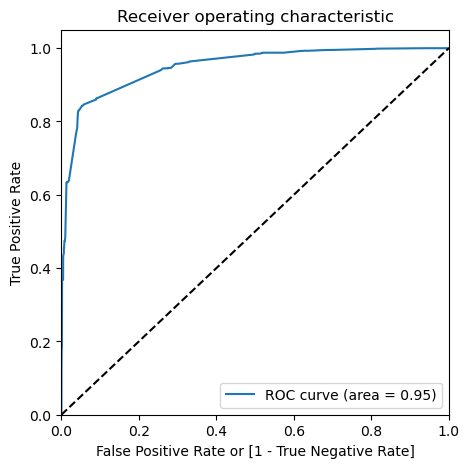

In [64]:
draw_roc(y_train_pred_final.Convert,y_train_pred_final.Convert_prob)

### Determining the top three features

In [65]:
# Get the coefficients
coefficients = result2.params

# Sort the features by their coefficients in descending order
sorted_features = coefficients.abs().sort_values(ascending=False)

# Identify the top three features
top_three_features = sorted_features.index[:3]

# Create a DataFrame with the top features and their coefficients
top_features_df = pd.DataFrame({'Feature': top_three_features, 'Coefficient': coefficients[top_three_features]})

print("Top Three Features Contributing to Conversion Probability:")
print(top_features_df)

Top Three Features Contributing to Conversion Probability:
                                                   Feature  Coefficient
Tags_Closed by Horizzon            Tags_Closed by Horizzon     8.821122
Tags_other_Tags                            Tags_other_Tags     4.790199
Lead Source_Welingak Website  Lead Source_Welingak Website     4.192969


In [66]:
# Get the coefficients
coefficients = result2.params

# Sort the features by their coefficients in descending order
sorted_features = coefficients.abs().sort_values(ascending=False)

# Identify the top three features
features = sorted_features.index

# Create a DataFrame with the top features and their coefficients
features_df = pd.DataFrame({'Feature': features,'Coefficient': coefficients[features]})

print("Features Contributing to Conversion Probability:")
print(features_df)

Features Contributing to Conversion Probability:
                                                                                              Feature  \
Tags_Closed by Horizzon                                                       Tags_Closed by Horizzon   
Tags_other_Tags                                                                       Tags_other_Tags   
Lead Source_Welingak Website                                             Lead Source_Welingak Website   
Tags_Will revert after reading the email                     Tags_Will revert after reading the email   
Tags_Busy                                                                                   Tags_Busy   
Lead Quality_Worst                                                                 Lead Quality_Worst   
Lead Quality_Not Sure                                                           Lead Quality_Not Sure   
const                                                                                           const   
Last A